In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Shape of Training Data ",x_train.shape)
print("Shape of Testing Data ", x_test.shape)

Shape of Training Data  (60000, 28, 28)
Shape of Testing Data  (10000, 28, 28)


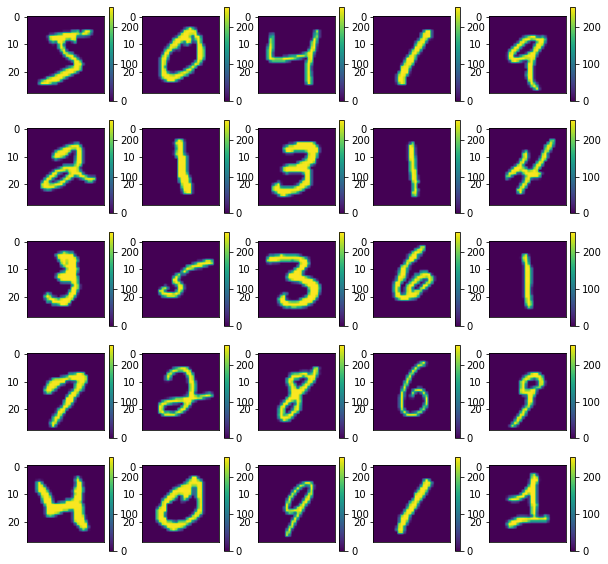

In [ ]:
#Look at some demo Images in Data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[i])
  plt.colorbar()
  plt.xticks([])
  # print("Label - ",y_train[i])
plt.show()

In [ ]:
#Normalizing Data as it is 28*28 form
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
#Shape of Data
print("Training Data - ", x_train.shape)
print("Testing Data - ", x_test.shape)

Training Data -  (60000, 784)
Testing Data -  (10000, 784)


In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

Compile The Code

In [ ]:
model.compile(optimizer=RMSprop(), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/20
469/469 [==============================] - 6s 7ms/step - loss: 0.6036 - accuracy: 0.8191 - val_loss: 0.1612 - val_accuracy: 0.9554
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2215 - accuracy: 0.9482 - val_loss: 0.1260 - val_accuracy: 0.9694
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1757 - accuracy: 0.9615 - val_loss: 0.1195 - val_accuracy: 0.9739
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1520 - accuracy: 0.9683 - val_loss: 0.1126 - val_accuracy: 0.9759
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1423 - accuracy: 0.9708 - val_loss: 0.1227 - val_accuracy: 0.9771
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1303 - accuracy: 0.9733 - val_loss: 0.1242 - val_accuracy: 0.9788
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1257 - accuracy: 0.9751 - val_loss: 0.1284 - val_accuracy: 0.9801
Epoch 

In [ ]:
score[0]

0.20026783645153046

In [ ]:
score[1]

0.9793999791145325